In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import re
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read the dataset
raw_df = pd.read_csv('/content/drive/MyDrive/Sample Project/Market Basket Analysis/bread_basket.csv')

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [12]:
raw_df.shape

(20507, 5)

In [13]:
raw_df.sample(10)

,Transaction,Item,date_time,period_day,weekday_weekend
11889,5894,Coffee,04-02-2017 09:17,morning,weekend
17557,8345,Tea,18-03-2017 10:57,morning,weekend
2545,1234,Coffee,13-11-2016 11:53,morning,weekend
9277,4673,Scandinavian,14-01-2017 11:37,morning,weekend
7721,3890,Hot chocolate,28-12-2016 11:43,morning,weekday
973,488,Pick and Mix Bowls,04-11-2016 12:51,afternoon,weekday
13579,6622,Hot chocolate,15-02-2017 15:24,afternoon,weekday
16457,7839,Sandwich,09-03-2017 14:13,afternoon,weekday
19525,9231,Bread,01-04-2017 17:39,evening,weekend
6807,3423,Bread,18-12-2016 14:07,afternoon,weekend


In [16]:
#Check for missing value
raw_df.isnull().sum()

,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


In [5]:
#Remove extra white spaces in "Item" column
raw_df['Item'] = raw_df['Item'].astype('str').apply(lambda x: re.sub(r'\s+',' ', x).strip())

In [21]:
#Transforming the item to 0 and 1
grouped_df = (raw_df.groupby(['Transaction','Item']).size().unstack().fillna(0).reset_index().set_index('Transaction'))

In [22]:
grouped_df.sample(5)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
6603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#any postive values are converted to a 1 and anything less than 0 is set to 0.
def custom_enconding(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

grouped_df = grouped_df.applymap(custom_enconding)

In [174]:
#Finding out which level of support and confidence to use

supportLevel = [0.1, 0.05, 0.01, 0.005]
confidenceLevel = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

rules_sup01 = []
rules_sup005 = []
rules_sup001 = []
rules_sup0005 = []

#Support 0.1
for i in confidenceLevel:
  rules_sup01.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[0], use_colnames=True)), metric="confidence", min_threshold=i)))

#Support 0.05
for i in confidenceLevel:
  rules_sup005.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[1], use_colnames=True)), metric="confidence", min_threshold=i)))

#Support 0.01
for i in confidenceLevel:
  rules_sup001.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[2], use_colnames=True)), metric="confidence", min_threshold=i)))

#Support 0.005
for i in confidenceLevel:
  rules_sup0005.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[3], use_colnames=True)), metric="confidence", min_threshold=i)))

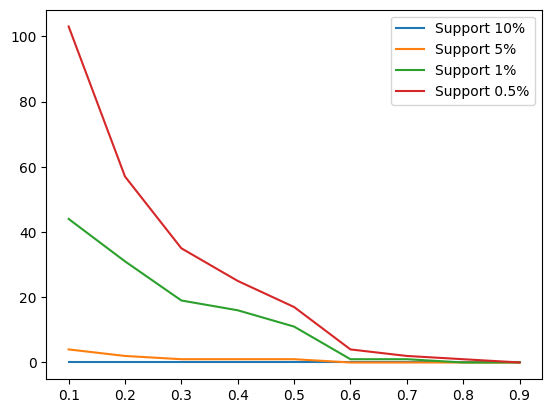

In [200]:
# Plot the result of the test

plt.plot(confidenceLevel, rules_sup01)
plt.plot(confidenceLevel, rules_sup005)
plt.plot(confidenceLevel, rules_sup001)
plt.plot(confidenceLevel, rules_sup0005)
plt.legend(['Support 10%', 'Support 5%', 'Support 1%', 'Support 0.5%'])
plt.show()

In [202]:
#Run the apriori algorithm
frequent_itemsets = apriori(grouped_df, min_support=0.01, use_colnames=True)

In [205]:
#Getting the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [206]:
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
9,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
8,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [23]:
# Highest transaction are observed during afternoon. Let's see if we get a different association rules

afternoon_df = (raw_df[raw_df['period_day'] == 'afternoon'].groupby(['Transaction','Item']).size().unstack().fillna(0).reset_index().set_index('Transaction'))

#any postive values are converted to a 1 and anything less than 0 is set to 0.
def custom_enconding(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

afternoon_df = grouped_df.applymap(custom_enconding)

In [24]:
# Run the apriori algorithm and asssociation rules using the same support and confidence level from earlier run

frequent_itemsets = apriori(afternoon_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(Toast),(Coffee),0.022401,0.459815,0.015131,0.675439,1.468935,0.004830,1.664353,0.326550
4,(Salad),(Coffee),0.017489,0.459815,0.011201,0.640449,1.392841,0.003159,1.502389,0.287063
3,(Pastry),(Coffee),0.045785,0.459815,0.025545,0.557940,1.213400,0.004493,1.221971,0.184308
7,(Spanish Brunch),(Coffee),0.024366,0.459815,0.013559,0.556452,1.210163,0.002355,1.217871,0.178003
5,(Sandwich),(Coffee),0.115936,0.459815,0.062291,0.537288,1.168487,0.008982,1.167432,0.163102
2,(Medialuna),(Coffee),0.037335,0.459815,0.020043,0.536842,1.167517,0.002876,1.166308,0.149046
1,(Cake),(Coffee),0.136766,0.459815,0.071920,0.525862,1.143638,0.009033,1.139299,0.145496
0,(Alfajores),(Coffee),0.044606,0.459815,0.022991,0.515419,1.120925,0.002480,1.114745,0.112916
6,(Scone),(Coffee),0.042051,0.459815,0.021222,0.504673,1.097556,0.001886,1.090562,0.092786


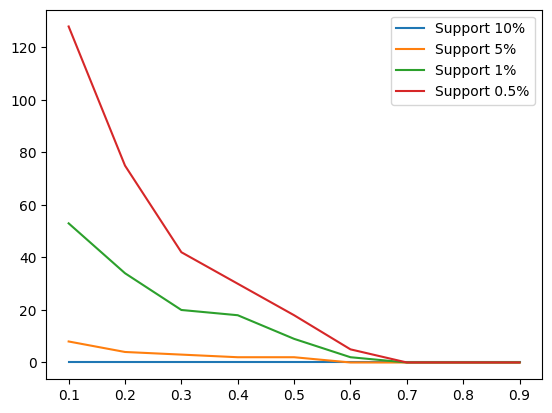

In [25]:
#Finding out which level of support and confidence to use

supportLevel = [0.1, 0.05, 0.01, 0.005]
confidenceLevel = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

rules_sup01 = []
rules_sup005 = []
rules_sup001 = []
rules_sup0005 = []

#Support 0.1
for i in confidenceLevel:
  rules_sup01.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[0], use_colnames=True)), metric="confidence", min_threshold=i)))

#Support 0.05
for i in confidenceLevel:
  rules_sup005.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[1], use_colnames=True)), metric="confidence", min_threshold=i)))

#Support 0.01
for i in confidenceLevel:
  rules_sup001.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[2], use_colnames=True)), metric="confidence", min_threshold=i)))

#Support 0.005
for i in confidenceLevel:
  rules_sup0005.append(len(association_rules((apriori(grouped_df, min_support=supportLevel[3], use_colnames=True)), metric="confidence", min_threshold=i)))

# Plot the result of the test

plt.plot(confidenceLevel, rules_sup01)
plt.plot(confidenceLevel, rules_sup005)
plt.plot(confidenceLevel, rules_sup001)
plt.plot(confidenceLevel, rules_sup0005)
plt.legend(['Support 10%', 'Support 5%', 'Support 1%', 'Support 0.5%'])
plt.show()

Future works

In [19]:
# Explore if there is a time period where Coffee is sold the highest.
# Testing hypothesis using t-test

# Data
coffee_afternoon = raw_df[raw_df['period_day'] == 'afternoon']
coffee_notafternoon = raw_df[raw_df['period_day'].isin(['morning','evening','night'])]

# Step 1: Form the null and alt hypothesis
null_hypothesis = "Coffee sale is not the same as afternoon for other period of the day"
alt_hypothesis = "Coffee sale is the same as afternoon for other period of the day"

# Step 2: Significance Level, we will be testing for three difference level, 0.1, 0.05 and 0.01
alpha1 = 0.1
alpha2 = 0.05
alpha3 = 0.01

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_ind(coffee_afternoon, coffee_notafternoon, equal_var=True)

# Step 4: Calculate the T-test manually
m = np.mean(coffee_afternoon - coffee_notafternoon)
s = np.std(coffee_afternoon - coffee_notafternoon, ddof=1)
n = len(raw_df)
t_statistic_manual = m / (s / np.sqrt(n))

# Step 5: Decision
if p_value <= alpha1:
  decision = 'Reject'
else:
  decision = 'Fail to Reject'

# Conclusion
if decision == 'Reject':
  conclusion = "There is statistically significant evidence that the coffee sales is not the same as afternoon for other period of the day."
else:
  conclusion = "There is insufficient evidence to claim a there is no significant difference in coffee sales throughout the day."

# Display result
print('T-statistic (from scipy): ', t_statistic)
print('P-value (from scipy): ', p_value)
print('T-statistic (calculated manually): ', t_statistic_manual)
print(f"Decision: {decision} the null hypothesis at alpha={alpha1}.")
print("Conclusion:", conclusion)

TypeError: unsupported operand type(s) for /: 'str' and 'int'